<a href="https://colab.research.google.com/github/MStamirski/News/blob/main/BagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import random as rnd

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read prepared dataset

In [4]:
allnews = pd.read_csv("drive/MyDrive/Colab_Notebooks/SDA_upskill/News/data/AllNews.csv")
allnews

,real,news
0,1,kandi burruss explodes rape accusation real ho...
1,1,people choice award 2018 best red carpet look
2,1,sophia bush send sweet birthday message one tr...
3,1,colombian singer maluma spark rumour inappropr...
4,1,gossip girl 10 year later upper east siders sh...
...,...,...
139657,1,fully commit nato back new us approach afghani...
139658,1,lexisnexis withdraw two product chinese market
139659,1,minsk cultural hub become authority
139660,1,vatican upbeat possibility pope francis visit ...


In [5]:
allnews['real'].value_counts(normalize=True)

1    0.539861
0    0.460139
Name: real, dtype: float64

slightly unbalanced data

# Vectorization using CountVectorizer

In [52]:
vectorizer = CountVectorizer(min_df=0.005, max_df=0.5, ngram_range=(1,3))
X_matrix = vectorizer.fit_transform(allnews['news'])

In [53]:
features = vectorizer.get_feature_names_out()
print(len(features))

290


In [54]:
print(features)

['2016' '2018' 'america' 'american' 'arrest' 'ask' 'attack' 'award' 'baby'
 'back' 'bad' 'ban' 'bernie' 'best' 'big' 'bill' 'black' 'blame' 'border'
 'break' 'breitbart' 'brexit' 'call' 'campaign' 'candidate' 'cant' 'case'
 'change' 'charge' 'chief' 'child' 'china' 'city' 'claim' 'climate'
 'clinton' 'cnn' 'come' 'comey' 'comment' 'congress' 'conservative' 'cop'
 'could' 'court' 'crisis' 'cruz' 'cut' 'date' 'day' 'dead' 'deal' 'death'
 'debate' 'defend' 'democrat' 'destroy' 'donald' 'donald trump' 'dont'
 'election' 'email' 'end' 'eu' 'even' 'exclusive' 'expose' 'face' 'fake'
 'family' 'fan' 'fbi' 'fight' 'find' 'fire' 'first' 'force' 'foreign'
 'former' 'fox' 'free' 'get' 'girl' 'give' 'go' 'gop' 'government'
 'governor' 'group' 'gun' 'hack' 'he' 'head' 'healthcare' 'help' 'here'
 'hillary' 'hillary clinton' 'hit' 'hold' 'home' 'host' 'house' 'illegal'
 'immigration' 'interview' 'investigation' 'iran' 'islamic' 'issue'
 'jenner' 'jennifer' 'job' 'john' 'judge' 'justice' 'kardashian' '

In [55]:
y = allnews['real']
y

0         1
1         1
2         1
3         1
4         1
         ..
139657    1
139658    1
139659    1
139660    1
139661    1
Name: real, Length: 139662, dtype: int64

In [56]:
X = pd.DataFrame(data=X_matrix.toarray(), columns=features)
X

,2016,2018,america,american,arrest,ask,attack,award,baby,back,...,white house,win,woman,wont,work,world,would,year,york,york time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139657,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
139658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Compare word clouds for fake and real news

In [87]:
def get_words(label, y, X):
  df = pd.concat([y, X], axis=1)
  df = df[df.iloc[:,0]==label]

  word_count = {}
  features = df.iloc[:,1:]
  for word in features:
    word_count[word] = features[word].sum()

  min_freq = min(word_count.values())
  for word in word_count.keys():
    word_count[word] = int(round(word_count[word]/min_freq,0))

  words_text = ''
  for word in word_count.keys():
    words_list = [word for count in range(word_count[word])]
    words_text += ' '.join(words_list)

  return words_text

In [88]:
words_fake = get_words(0, y, X)
len(words_fake)

23585

In [89]:
words_real = get_words(1, y, X)
len(words_real)

28145

In [91]:
def show_word_cloud(text):
  cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

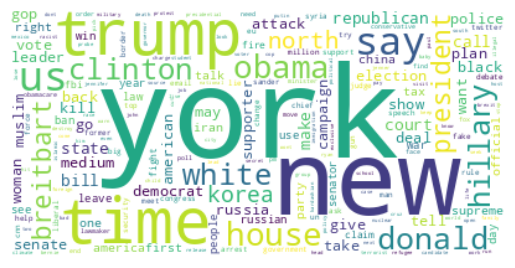

In [92]:
show_word_cloud(words_fake)

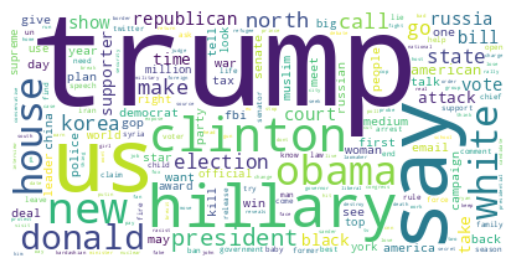

In [93]:
show_word_cloud(words_real)

# Real or fake prediction using LGMBClassifier

In [11]:
def train_val_test_split(X, y, threshold):
  df = pd.concat([y, X], axis=1)

  df_test = df.sample(frac=threshold, random_state=42)
  
  df_train_val = df.drop(df_test.index)
  df_val = df_train_val.sample(frac=threshold, random_state=42)
  
  df_train = df_train_val.drop(df_val.index)
  
  y_test = df_test.iloc[:,0]
  X_test = df_test.iloc[:,1:]

  y_val = df_val.iloc[:,0]
  X_val = df_val.iloc[:,1:]

  y_train = df_train.iloc[:,0]
  X_train = df_train.iloc[:,1:]

  return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [12]:
train, val, test = train_val_test_split(X, y, 0.2)

# df[0] : X
# df[1] : y

In [13]:
def describe_dataset(title, df):
  string1 = f"{title}: X length: {len(df[0])}, "
  string2 = f"X width: {len(df[0].columns)}, "
  string3 = f"y length: {len(df[1])}, "
  string4 = f"value count {df[1].value_counts(normalize=True).index[0]}: {round(df[1].value_counts(normalize=True)[0],2)}, "
  string5 = f"value count {df[1].value_counts(normalize=True).index[1]}: {round(df[1].value_counts(normalize=True)[1],2)}"
  print(string1 + string2 + string3 + string4 + string5)

In [14]:
describe_dataset('TRAIN', train)

TRAIN: X length: 89384, X width: 290, y length: 89384, value count 1: 0.46, value count 0: 0.54


In [15]:
describe_dataset('VALID', val)

VALID: X length: 22346, X width: 290, y length: 22346, value count 1: 0.46, value count 0: 0.54


In [16]:
describe_dataset('TEST ', test)

TEST : X length: 27932, X width: 290, y length: 27932, value count 1: 0.45, value count 0: 0.55


In [17]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
def predict_test_news(train, val, test):
  model = lgb.LGBMClassifier(verbose= -100)
  model.fit(train[0], train[1], eval_set = [(val[0], val[1]), (train[0], train[1])], early_stopping_rounds=10, verbose=False)

  prediction = model.predict(test[0])

  print(f"\nPrecision: {precision_score(test[1], prediction):.2f}")
  print(f"Recall:    {recall_score(test[1], prediction):.2f}")
  print(f'F1:        {f1_score(test[1], prediction):.2f}\n')
  
  cm = confusion_matrix(test[1], prediction)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["FAKE", "REAL"])
  cm_display.plot()
  plt.show()

  lgb.plot_metric(model)


Precision: 0.59
Recall:    0.87
F1:        0.70



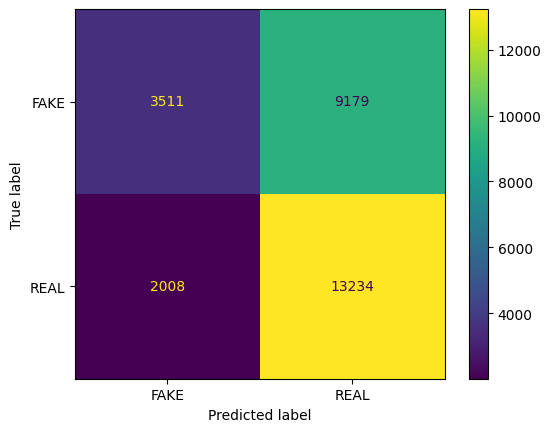

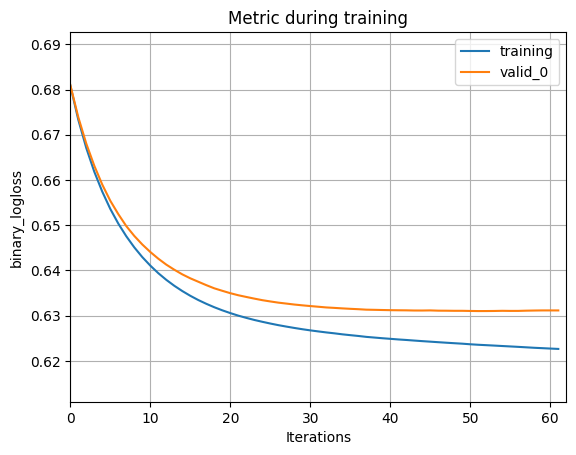

In [21]:
predict_test_news(train, val, test)

# Vectorization using TfIdf Vectorizer

In [22]:
vectorizer = TfidfVectorizer(min_df=0.005, max_df=0.5, ngram_range=(1,3))
X_matrix = vectorizer.fit_transform(allnews['news'])

In [23]:
features = vectorizer.get_feature_names_out()
print(len(features))

290


In [24]:
print(features)

['2016' '2018' 'america' 'american' 'arrest' 'ask' 'attack' 'award' 'baby'
 'back' 'bad' 'ban' 'bernie' 'best' 'big' 'bill' 'black' 'blame' 'border'
 'break' 'breitbart' 'brexit' 'call' 'campaign' 'candidate' 'cant' 'case'
 'change' 'charge' 'chief' 'child' 'china' 'city' 'claim' 'climate'
 'clinton' 'cnn' 'come' 'comey' 'comment' 'congress' 'conservative' 'cop'
 'could' 'court' 'crisis' 'cruz' 'cut' 'date' 'day' 'dead' 'deal' 'death'
 'debate' 'defend' 'democrat' 'destroy' 'donald' 'donald trump' 'dont'
 'election' 'email' 'end' 'eu' 'even' 'exclusive' 'expose' 'face' 'fake'
 'family' 'fan' 'fbi' 'fight' 'find' 'fire' 'first' 'force' 'foreign'
 'former' 'fox' 'free' 'get' 'girl' 'give' 'go' 'gop' 'government'
 'governor' 'group' 'gun' 'hack' 'he' 'head' 'healthcare' 'help' 'here'
 'hillary' 'hillary clinton' 'hit' 'hold' 'home' 'host' 'house' 'illegal'
 'immigration' 'interview' 'investigation' 'iran' 'islamic' 'issue'
 'jenner' 'jennifer' 'job' 'john' 'judge' 'justice' 'kardashian' '

In [25]:
X = pd.DataFrame(data=X_matrix.toarray(), columns=features)
X

,2016,2018,america,american,arrest,ask,attack,award,baby,back,...,white house,win,woman,wont,work,world,would,year,york,york time
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.452312,0.0,0.0,0.0,0.0,0.0,0.463797,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.435221,0.0,0.404674,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139657,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.720728,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
139658,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
139659,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
139660,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


# Prediction

In [26]:
train, val, test = train_val_test_split(X, y, 0.2)

In [27]:
describe_dataset('TRAIN', train)

TRAIN: X length: 89384, X width: 290, y length: 89384, value count 1: 0.46, value count 0: 0.54


In [28]:
describe_dataset('VALID', val)

VALID: X length: 22346, X width: 290, y length: 22346, value count 1: 0.46, value count 0: 0.54


In [29]:
describe_dataset('TEST ', test)

TEST : X length: 27932, X width: 290, y length: 27932, value count 1: 0.45, value count 0: 0.55



Precision: 0.59
Recall:    0.88
F1:        0.70



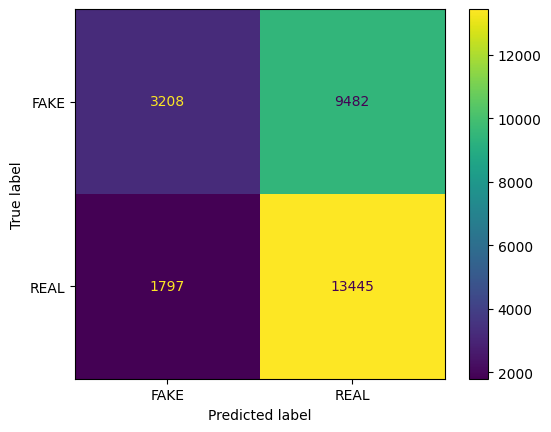

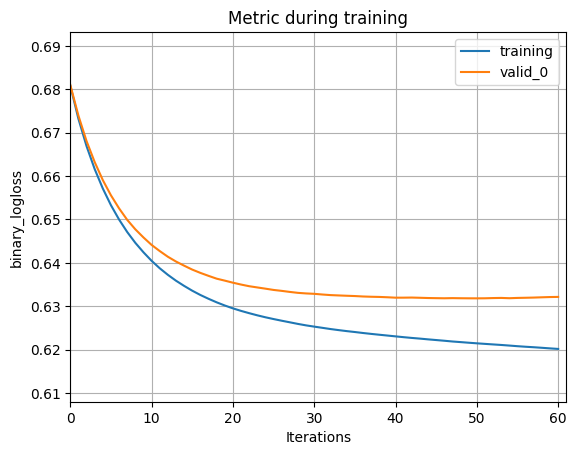

In [30]:
predict_test_news(train, val, test)

# Summary

Two method of vectorization were used: CountVectorizer (which returns vectors with integer values meaning number of given word appearance in text) and TfIdf (wchich returns float values based also on word appearance in whole dataset). For separated real and fake news the most important words were counted and presented in two word clouds. Then prediction was conducted, using LGBMClassifier. F1 score was equal 0.70. A similiar prediction was performed for news vectorized by TfIdf. It turned out, that the result was identical.